In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import mpl
plt.rcParams['font.sans-serif'] = ['STSong']
plt.rcParams['axes.unicode_minus'] = False
import warnings
warnings.filterwarnings('ignore')

import os
import sys
import random

In [2]:
# 读取文件列表
file_name = os.listdir('./data')
res = [file for file in file_name]

In [3]:
datas = []
for file in res:
    filename = file.replace('.csv','')
    file = './data/'+file
    try:
        data = pd.read_csv(file)
        datas.append(data)
        # price = data['unit_price']
        # max_price = price.max()
        # min_price = price.min()
        # mean_price = price.mean()
        # median_price = price.median()
        # print("%s二手房最高价格：%.2f元/平方米" %(filename,max_price))
        # print("%s二手房最低价格：%.2f元/平方米" %(filename,min_price))
        # print("%s二手房平均价格：%.2f元/平方米" %(filename,mean_price))
        # print("%s二手房中位数价格：%.2f元/平方米" %(filename,median_price))
    except:
        print('%s暂无数据'%filename)

# 得到所有合并数据
result = pd.concat(datas)

In [4]:
print(result.info())
print(result.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110556 entries, 0 to 1297
Data columns (total 16 columns):
title                110556 non-null object
price                110556 non-null float64
unit_price           110556 non-null float64
community_name       110556 non-null object
region               110556 non-null object
type                 110556 non-null object
construction_area    110556 non-null object
orientation          108777 non-null object
decoration           108863 non-null object
floor                110556 non-null object
elevator             110556 non-null object
purposes             110556 non-null object
release_date         110556 non-null object
house_structure      110412 non-null object
image_urls           110556 non-null object
from_url             110556 non-null object
dtypes: float64(2), object(14)
memory usage: 14.3+ MB
None
(110556, 16)


In [47]:
import pandas_profiling as ppf

In [48]:
ppf.ProfileReport(result)

# 数据清洗

# 去重

In [5]:
print(result.duplicated().value_counts()) 

False    103494
True       7062
dtype: int64


In [6]:
res = result.drop_duplicates(subset=None,keep='first',inplace=False)
print(res.duplicated().value_counts()) 

False    103494
dtype: int64


# 检测与处理缺失值

In [7]:
# 缺失值处理
res.isnull().sum()

title                   0
price                   0
unit_price              0
community_name          0
region                  0
type                    0
construction_area       0
orientation          1779
decoration           1693
floor                   0
elevator                0
purposes                0
release_date            0
house_structure       144
image_urls              0
from_url                0
dtype: int64

In [8]:
res1 = res.copy()

In [9]:
# 删除车库
cart_index = res1[res1['purposes']=='车库'].index
res1 = res1.drop(cart_index,axis=0)

In [10]:
# 填充NAN
orientations = ['东','南','西','北','东南','西南','东北','西北']
decorations = ['简装','精装','毛坯','其他']
house_structures = ['钢混结构','钢结构','混合结构','框架结构','未知','砖混结构','砖木结构']
res1['orientation'].fillna(random.choice(orientations),inplace=True)
res1['decoration'].fillna(random.choice(decorations),inplace=True)
res1['house_structure'].fillna(random.choice(house_structures),inplace=True)

# 检测与处理异常值

In [11]:
# 异常值处理
# parse ㎡ into null and parse into float
res1['construction_area'] = res1['construction_area'].str.replace('㎡','').astype("float")
print(res1.describe())
u_mean_price = res1.describe().loc['mean','unit_price']
mean_price = res1.describe().loc['mean','price']

               price     unit_price  construction_area
count  101249.000000  101249.000000      101249.000000
mean      156.685416   14608.344076         110.271534
std       173.083472    6499.169900        2615.638107
min         0.000000       0.000000           9.530000
25%        81.600000   10121.500000          72.480000
50%       120.000000   13425.200000          89.280000
75%       176.000000   17704.300000         120.170000
max     10000.000000  135928.000000      832186.000000


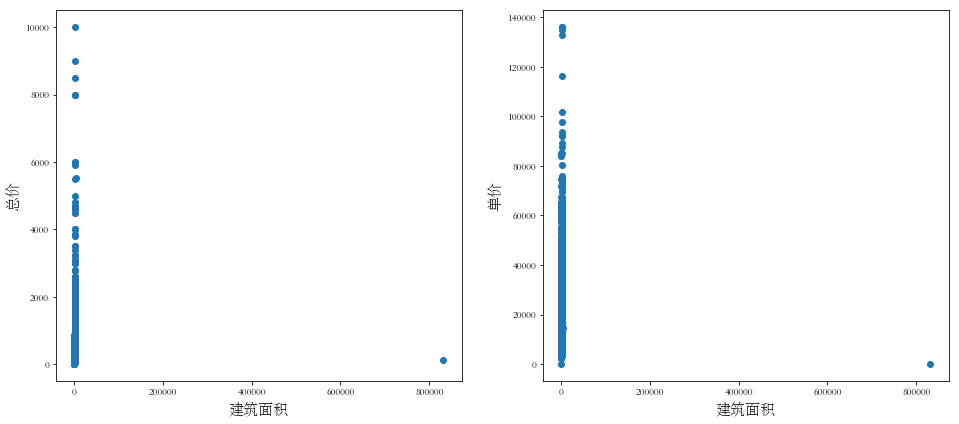

In [12]:
plt.figure(figsize=(16,15)) 
plt.subplot(221)
plt.scatter(res1["construction_area"], res1["price"])
plt.xlabel('建筑面积',fontsize=15)
plt.ylabel('总价',fontsize=15)
 
plt.subplot(222)
plt.scatter(res1["construction_area"], res1["unit_price"])
plt.xlabel('建筑面积',fontsize=15)
plt.ylabel('单价',fontsize=15)
plt.show()

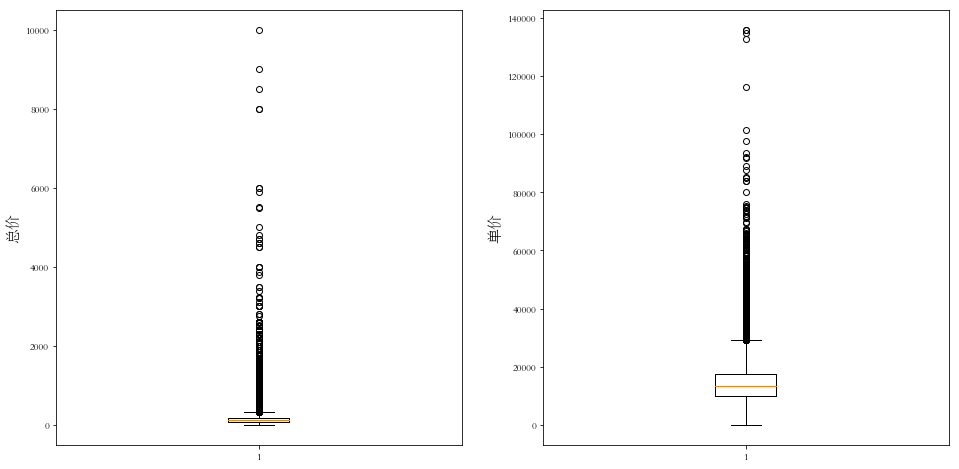

In [13]:
plt.figure(figsize=(16,8)) 
plt.subplot(1,2,1)
plt.boxplot(res1["price"])
plt.ylabel('总价',fontsize=15)
plt.subplot(1,2,2)
plt.boxplot(res1["unit_price"])
plt.ylabel('单价',fontsize=15)
plt.show()

# 异常值处理

In [15]:
# 处理离群值和有失一般性值
res1.drop(res1[res1['construction_area']>1000].index,inplace=True)

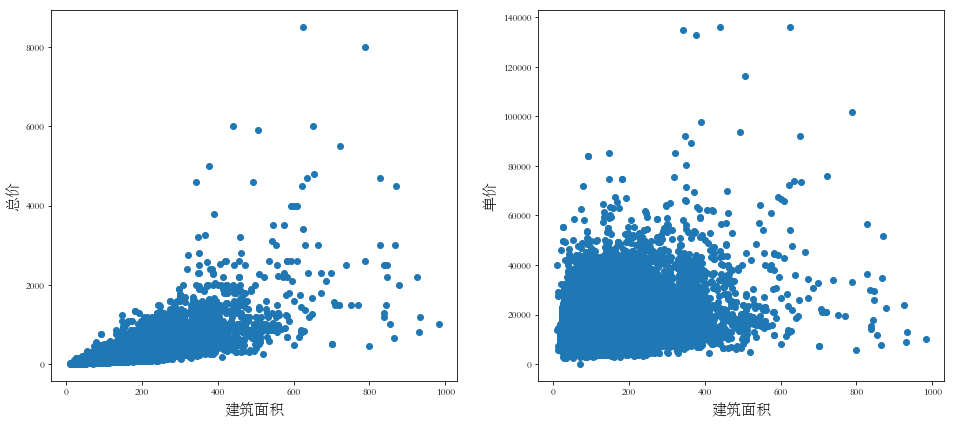

In [16]:
plt.figure(figsize=(16,15)) 
plt.subplot(221)
plt.scatter(res1["construction_area"], res1["price"])
plt.xlabel('建筑面积',fontsize=15)
plt.ylabel('总价',fontsize=15)
 
plt.subplot(222)
plt.scatter(res1["construction_area"], res1["unit_price"])
plt.xlabel('建筑面积',fontsize=15)
plt.ylabel('单价',fontsize=15)
plt.show()

In [22]:
# 处理price和unit_price为 0 的数据
print(res1[res1['unit_price']==0])
print(res1[res1['unit_price']==0]['community_name'])

                   title  price  unit_price community_name         region  \
250  标准套二   精装修     中间楼层    0.0         0.0           东洪广厦  ['锦江', '三圣乡']   

       type  construction_area orientation decoration       floor elevator  \
250  2室1厅1卫              71.17          东南         精装  中楼层 (共34层)        有   

    purposes release_date house_structure  \
250     普通住宅   2020-01-04            钢混结构   

                                            image_urls  \
250  ['https://vrlab-image4.ljcdn.com/release/auto3...   

                                              from_url  
250  https://cd.ke.com/ershoufang/20010617710100167...  
250    东洪广厦
Name: community_name, dtype: object


In [17]:
# def judge(community):
#     # 获取当前小区均价
#     com = res[res['community_name']==community]
#     com_unit_price = com['unit_price'].mean()
#     return com_unit_price


# res.iloc[32354,3] = judge(str(res[res['unit_price']==0]['community_name']))
# total_price =format(float(res.iloc[32354,7]) * u_mean_price / 10000,'.1f')
# res.iloc[32354,2] = total_price

# res.iloc[32354,3] = u_mean_price
# total_price =format(float(res.iloc[32354,7]) * u_mean_price / 10000,'.1f')
# res.iloc[32354,2] = total_price
# print(res.loc[32354])

# 直接删除
res1.drop(res1[res1['price']==0].index,inplace=True)
print(res1[res1['unit_price']==0])

Empty DataFrame
Columns: [title, price, unit_price, community_name, region, type, construction_area, orientation, decoration, floor, elevator, purposes, release_date, house_structure, image_urls, from_url]
Index: []


# 其他标准

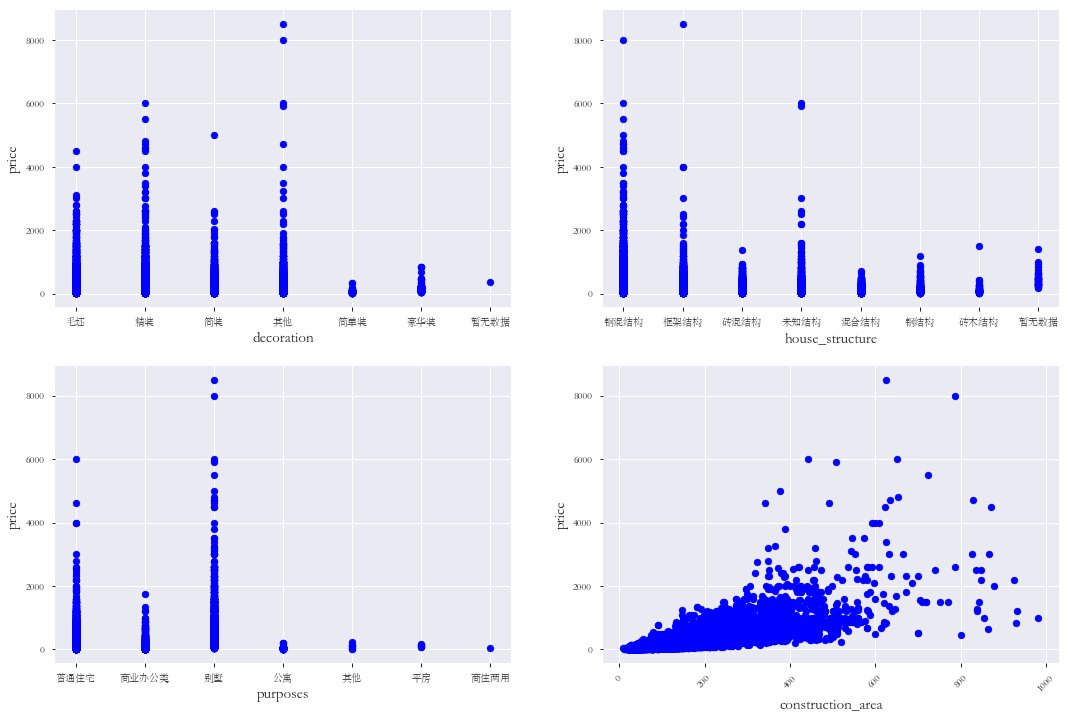

In [24]:
plt.figure(figsize=(18,12))

plt.subplot(2, 2, 1)
plt.scatter(x=res1.decoration, y=res1.price,color='b')
plt.xlabel("decoration", fontsize=15)
plt.ylabel("price", fontsize=15)

plt.subplot(2, 2, 2)
plt.scatter(x=res1.house_structure, y=res1.price,color='b')
plt.xlabel("house_structure", fontsize=15)
plt.ylabel("price", fontsize=15)

plt.subplot(2, 2, 3)
plt.scatter(x=res1.purposes, y=res1.price,color='b')
plt.xlabel("purposes", fontsize=15)
plt.ylabel("price", fontsize=15)

plt.subplot(2, 2, 4)
plt.scatter(x=res1.construction_area, y=res1.price,color='b')
plt.xticks(rotation=45)
plt.xlabel("construction_area", fontsize=15)
plt.ylabel("price", fontsize=15)    

plt.show()

In [19]:
## 删除异常值
res1.drop(res1[(res1['decoration']=='其他') & (res1['price']>6000)].index,inplace=True)
res1.drop(res1[(res1['house_structure']=='钢混结构') & (res1['price']>7000)].index,inplace=True)
res1.drop(res1[(res1['house_structure']=='框架结构') & (res1['price']>6000)].index,inplace=True)
res1.drop(res1[(res1['house_structure']=='未知结构') & (res1['price']>4000)].index,inplace=True)
res1.drop(res1[(res1['purposes']=='普通住宅') & (res1['price']>6000)].index,inplace=True)
res1.drop(res1[(res1['construction_area']>700) & (res1['price']<300)].index,inplace=True)
res1.drop(res1[(res1['construction_area']<600) & (res1['price']>4000)].index,inplace=True)

# 地理编码转换
#### 使用百度地图解析进行具体地址转换为经纬度操作

In [20]:
complete_data = res1.copy()
# 添加id
complete_data['id'] = range(len(complete_data))

In [22]:
import json
import re
from urllib.request import quote
import requests

In [24]:
# lat纬度 lng经度
def getlnglat_baidu(address):
    """
    获取一个中文地址的经纬度(lat:纬度值,lng:经度值)
    """
    address = quote(address) # quote编码,防止中文乱码
    url_base = "http://api.map.baidu.com/geocoder/v2/"
    output = "json"
    ak = "Qmz0VMtKw3uAI2GWClu9Q6iCnP2j2uH2"
    url = url_base + '?' + 'address=' + address  + '&output=' + output + '&ak=' + ak
    
    lat = 0.0
    lng = 0.0
    res = requests.get(url)
    temp = json.loads(res.text)
    if temp["status"] == 0:
        lat = temp['result']['location']['lat']
        lng = temp['result']['location']['lng']
    return lat,lng

def getlnglat_gaode(address):
    address = quote(address)
    url_base = "http://restapi.amap.com/v3/geocode/geo"
    output = "json"
    key = "5d297ac38ce0db596ad9656b13fa9b08"
    url = url_base + '?' + 'address=' + address  + '&output=' + output + '&key=' + key
    
    lat = 0.0
    lng = 0.0
    res = requests.get(url)
    temp = json.loads(res.text)
    location = temp['geocodes'][0]['location'].split(',')
    if temp["info"] == 'OK':
        lat = location[1]
        lng = location[0]
    return lat,lng

lat,lang = getlnglat_baidu('四川省成都市新津金秋乐园一期')
print('lat:{}'.format(lat))
print('lang:{}'.format(lang))

# lat,lang = getlnglat_gaode('四川省成都市新津金秋乐园一期')
# print(lat)
# print(lang)

lat:30.48943665040442
lang:103.89577048859141


In [23]:
# 生成经纬度信息
idint = []
community_names = []
lats = []
lngs = []
address = ''
lat_lng_data = {"id":idint,"community_name":community_names,"lat":lats,"lng":lngs}

for idi,community_name,region in zip(list(complete_data["id"]),list(complete_data["community_name"]),list(complete_data["region"])):
    community_name = str(community_name)
    region = re.sub(r"\[|\]|'","",region).split(',')
    if len(region)>=2:
        if region[0] != region[1]:
            address = "成都市"+region[0]+region[1]+community_name
        else:
            address = "成都市"+region[0]+community_name
    else:
        address = "成都市"+region[0]+community_name
#     print(address)
#     print('*'*20)
    lat,lng = getlnglat_gaode(address)
    if lat != 0 or lng !=0:
        idint.append(idi)
        community_names.append(community_name)
        lats.append(lat)
        lngs.append(lng)
        print(idi,lat,lng)
    if idi>0 and idi%2000==0:
        df_latlng = pd.DataFrame(lat_lng_data)
        df_latlng.to_csv("./cleandata/latlng"+str(idi)+".csv",encoding='gbk')
        idint = []
        community_names = []
        lats = []
        lngs = []
        address = ''
        lat_lng_data = {"id":idint,"community_name":community_names,"lat":lats,"lng":lngs}

92001 30.580347 104.004441
92002 30.575698 103.999614
92003 30.568066 104.004033
92004 30.577553 103.991875
92005 30.560799 103.989535
92006 30.599671 104.051936
92007 30.577351 103.985685
92008 30.579742 104.056680
92009 30.599671 104.051936
92010 30.577101 104.006705
92011 30.570415 103.988474
92012 30.604670 104.062661
92013 30.551529 103.982498
92014 30.599671 104.051936
92015 30.570415 103.988474
92016 30.568066 104.004033
92017 30.604285 104.056045
92018 30.573346 103.987943
92019 30.568066 104.004033
92020 30.570116 103.986429
92021 30.574485 103.991558
92022 30.568066 104.004033
92023 30.575698 103.999614
92024 30.573346 103.987943
92025 30.564329 103.997307
92026 30.562762 103.978581
92027 30.563616 104.009720
92028 30.566799 103.989769
92029 30.579742 104.056680
92030 30.579742 104.056680
92031 30.569172 103.999242
92032 30.579742 104.056680
92033 30.566799 103.989769
92034 30.566654 104.010929
92035 30.566799 103.989769
92036 30.570415 103.988474
92037 30.551529 103.982498
9

92306 30.653180 104.017260
92307 30.656160 104.017448
92308 30.626403 104.056008
92309 30.610697 103.986672
92310 30.646094 104.047994
92311 30.596598 103.982828
92312 30.572269 104.066541
92313 30.629620 104.053240
92314 30.631810 104.054170
92315 30.632010 104.053874
92316 30.610697 103.986672
92317 30.652685 104.014293
92318 30.656160 104.017448
92319 30.621001 104.083505
92320 30.654048 104.014447
92321 30.625589 104.050280
92322 30.653180 104.017260
92323 30.654048 104.014447
92324 30.606805 104.026608
92325 30.625176 104.054572
92326 30.601975 103.987284
92327 30.608460 103.994161
92328 30.633084 104.053677
92329 30.656160 104.017448
92330 30.652685 104.014293
92331 30.596598 103.982828
92332 30.601975 103.987284
92333 30.610697 103.986672
92334 30.621001 104.083505
92335 30.610721 103.969991
92336 30.626434 104.049494
92337 30.653180 104.017260
92338 30.572269 104.066541
92339 30.646094 104.047994
92340 30.603294 104.029249
92341 30.632023 104.054034
92342 30.572269 104.066541
9

92610 30.566799 103.989769
92611 30.600814 104.059443
92612 30.567600 103.981318
92613 30.570691 103.997534
92614 30.570691 103.997534
92615 30.493144 103.996616
92616 30.567600 103.981318
92617 30.576464 103.998627
92618 30.567600 103.981318
92619 30.575698 103.999614
92620 30.564329 103.997307
92621 30.570415 103.988474
92622 30.570691 103.997534
92623 30.562762 103.978581
92624 30.580347 104.004441
92625 30.577351 103.985685
92626 30.570691 103.997534
92627 30.599671 104.051936
92628 30.566654 104.010929
92629 30.575476 103.991319
92630 30.571073 103.990337
92631 30.566799 103.989769
92632 30.577351 103.985685
92633 30.577054 104.002767
92634 30.566799 103.989769
92635 30.576388 104.011153
92636 30.570415 103.988474
92637 30.572632 103.996128
92638 30.569347 104.008616
92639 30.566654 104.010929
92640 30.564800 103.977017
92641 30.569152 103.973778
92642 30.577054 104.002767
92643 30.564519 103.979971
92644 30.575698 103.999614
92645 30.627494 103.985553
92646 30.571073 103.990337
9

92914 30.628886 104.053322
92915 30.603886 103.989376
92916 30.625287 104.079107
92917 30.656160 104.017448
92918 30.656160 104.017448
92919 30.638038 104.089004
92920 30.638038 104.089004
92921 30.652315 104.013309
92922 30.619953 104.028762
92923 30.656160 104.017448
92924 30.646094 104.047994
92925 30.656160 104.017448
92926 30.572269 104.066541
92927 30.628002 104.037119
92928 30.637966 104.085793
92929 30.627790 104.061066
92930 30.638758 104.084926
92931 30.640903 104.085698
92932 30.635445 104.077171
92933 30.646094 104.047994
92934 30.639250 104.085965
92935 30.646094 104.047994
92936 30.646094 104.047994
92937 30.641191 104.083858
92938 30.646094 104.047994
92939 30.646094 104.047994
92940 30.639300 104.081626
92941 30.640903 104.085698
92942 30.646094 104.047994
92943 30.646094 104.047994
92944 30.625589 104.050280
92945 30.572269 104.066541
92946 30.646094 104.047994
92947 30.646094 104.047994
92948 30.644745 104.075834
92949 30.646094 104.047994
92950 30.646094 104.047994
9

93218 30.572269 104.066541
93219 30.646859 104.055839
93220 30.635445 104.059523
93221 30.627762 104.063627
93222 30.637612 104.059734
93223 30.646094 104.047994
93224 30.643683 104.058955
93225 30.641459 104.064726
93226 30.646094 104.047994
93227 30.654048 104.014447
93228 30.608618 103.987586
93229 30.615583 104.077474
93230 30.606215 103.987826
93231 30.625238 104.055917
93232 30.646094 104.047994
93233 30.637332 104.085362
93234 30.654048 104.014447
93235 30.627697 104.052982
93236 30.610697 103.986672
93237 30.601466 103.993711
93238 30.656160 104.017448
93239 30.621454 104.079486
93240 30.637966 104.085793
93241 30.646094 104.047994
93242 30.624355 104.082611
93243 30.572269 104.066541
93244 30.635753 104.081195
93245 30.637966 104.085793
93246 30.572269 104.066541
93247 30.603683 103.997731
93248 30.638038 104.089004
93249 30.638038 104.089004
93250 30.632950 104.055690
93251 30.656160 104.017448
93252 30.611985 103.962166
93253 30.601975 103.987284
93254 30.624112 104.082971
9

93523 30.636649 104.029448
93524 30.626350 104.016240
93525 30.635351 104.020875
93526 30.638186 104.018979
93527 30.629833 104.017962
93528 30.630924 104.014292
93529 30.633701 104.028471
93530 30.632526 104.015880
93531 30.636292 104.014832
93532 30.633701 104.028471
93533 30.612445 104.068652
93534 30.636292 104.014832
93535 30.636649 104.029448
93536 30.636292 104.014832
93537 30.636649 104.029448
93538 30.638186 104.018979
93539 30.636331 104.027782
93540 30.640640 104.024757
93541 30.638526 104.023770
93542 30.629767 104.024785
93543 30.638333 104.020806
93544 30.637489 104.028448
93545 30.635759 104.028656
93546 30.635759 104.028656
93547 30.630924 104.014292
93548 30.633976 104.010319
93549 30.638556 104.019660
93550 30.618551 104.068185
93551 30.636128 104.016141
93552 30.618710 104.070792
93553 30.635089 104.028287
93554 30.636331 104.027782
93555 30.629767 104.024785
93556 30.633701 104.028471
93557 30.636128 104.016141
93558 30.633272 104.020046
93559 30.632526 104.015880
9

93827 30.630015 103.995791
93828 30.636038 104.039646
93829 30.634058 104.040283
93830 30.632263 104.036470
93831 30.634726 104.035426
93832 30.636096 104.034416
93833 30.632263 104.036470
93834 30.632152 103.995515
93835 30.660767 103.979760
93836 30.633514 104.036857
93837 30.635069 104.042022
93838 30.634736 104.036772
93839 30.644243 103.979650
93840 30.638078 104.038064
93841 30.651723 103.977056
93842 30.643984 103.969708
93843 30.633865 103.993729
93844 30.634329 104.033380
93845 30.647265 103.979192
93846 30.635966 104.038223
93847 30.627494 103.985553
93848 30.493144 103.996616
93849 30.631020 104.037519
93850 30.627718 103.986861
93851 30.637520 104.036804
93852 30.633865 103.993729
93853 30.646094 104.047994
93854 30.635966 104.038223
93855 30.632263 104.036470
93856 30.493144 103.996616
93857 30.637258 104.034693
93858 30.636905 104.040520
93859 30.638454 104.038960
93860 30.493144 103.996616
93861 30.646094 104.047994
93862 30.630015 103.995791
93863 30.635966 104.038223
9

94131 30.622530 104.063255
94132 30.628442 104.065019
94133 30.646094 104.047994
94134 30.642679 104.058460
94135 30.643683 104.058955
94136 30.643001 104.044865
94137 30.638836 104.057017
94138 30.623631 104.060094
94139 30.631435 104.060742
94140 30.642131 104.048414
94141 30.631435 104.060742
94142 30.636503 104.057094
94143 30.623737 104.062963
94144 30.641459 104.064726
94145 30.638942 104.067702
94146 30.635228 104.057403
94147 30.631435 104.060742
94148 30.623737 104.062963
94149 30.623737 104.062963
94150 30.646094 104.047994
94151 30.638651 104.062963
94152 30.640554 104.044943
94153 30.646094 104.047994
94154 30.625486 104.059039
94155 30.621601 104.059835
94156 30.646094 104.047994
94157 30.623434 104.064883
94158 30.635657 104.055501
94159 30.634049 104.064042
94160 30.644640 104.062446
94161 30.628442 104.065019
94162 30.622398 104.066392
94163 30.629805 104.062372
94164 30.628183 104.063366
94165 30.641459 104.064726
94166 30.635445 104.059523
94167 30.631435 104.060742
9

94436 30.637288 104.054495
94437 30.606215 103.987826
94438 30.605987 103.985301
94439 30.572269 104.066541
94440 30.637064 104.056341
94441 30.596598 103.982828
94442 30.641510 104.047767
94443 30.626333 104.061451
94444 30.631435 104.060742
94445 30.642278 104.055623
94446 30.625053 104.061193
94447 30.628442 104.065019
94448 30.624000 104.062000
94449 30.641459 104.064726
94450 30.631435 104.060742
94451 30.635056 104.059870
94452 30.639550 104.060628
94453 30.635228 104.057403
94454 30.623519 104.062280
94455 30.635763 104.059030
94456 30.625176 104.054572
94457 30.654048 104.014447
94458 30.628201 104.053377
94459 30.646094 104.047994
94460 30.656160 104.017448
94461 30.623250 104.082258
94462 30.621001 104.083505
94463 30.625984 104.084048
94464 30.606215 103.987826
94465 30.608618 103.987586
94466 30.629795 104.057114
94467 30.631977 104.055982
94468 30.625176 104.054572
94469 30.605987 103.985301
94470 30.622345 104.083198
94471 30.625181 104.082134
94472 30.624756 104.083932
9

94741 30.622530 104.077365
94742 30.622345 104.083198
94743 30.646094 104.047994
94744 30.654048 104.014447
94745 30.632235 104.053881
94746 30.608059 103.983976
94747 30.652685 104.014293
94748 30.636662 104.085807
94749 30.626434 104.049494
94750 30.656160 104.017448
94751 30.610697 103.986672
94752 30.646094 104.047994
94753 30.652315 104.013309
94754 30.638638 104.088534
94755 30.656160 104.017448
94756 30.628597 104.057072
94757 30.608618 103.987586
94758 30.624221 104.057500
94759 30.656160 104.017448
94760 30.624221 104.057500
94761 30.622530 104.077365
94762 30.607028 103.979877
94763 30.608059 103.983976
94764 30.652685 104.014293
94765 30.637332 104.085362
94766 30.612437 103.970068
94767 30.646094 104.047994
94768 30.646094 104.047994
94769 30.621001 104.083505
94770 30.652685 104.014293
94771 30.628366 104.057855
94772 30.646094 104.047994
94773 30.620861 104.080882
94774 30.610697 103.986672
94775 30.653256 104.015716
94776 30.622345 104.083198
94777 30.622345 104.083198
9

95046 30.632578 104.009896
95047 30.632578 104.009896
95048 30.632578 104.009896
95049 30.632526 104.015880
95050 30.632578 104.009896
95051 30.614911 104.072662
95052 30.632445 104.035766
95053 30.632200 104.021103
95054 30.644065 104.036118
95055 30.641689 104.036772
95056 30.634120 104.011315
95057 30.633272 104.020046
95058 30.614678 104.071398
95059 30.618710 104.070792
95060 30.640843 104.036175
95061 30.641981 104.040362
95062 30.641981 104.040362
95063 30.639865 104.035213
95064 30.635759 104.028656
95065 30.644361 104.038403
95066 30.618627 104.068504
95067 30.629833 104.017962
95068 30.616166 104.070405
95069 30.629833 104.017962
95070 30.614272 104.073797
95071 30.640640 104.024757
95072 30.636128 104.016141
95073 30.636292 104.014832
95074 30.642981 104.035609
95075 30.632578 104.009896
95076 30.632578 104.009896
95077 30.632578 104.009896
95078 30.632106 104.013835
95079 30.636128 104.016141
95080 30.632578 104.009896
95081 30.614911 104.072662
95082 30.638333 104.020806
9

95350 30.563616 104.009720
95351 30.566654 104.010929
95352 30.562983 103.999778
95353 30.575537 103.988184
95354 30.604129 104.064884
95355 30.580196 104.008748
95356 30.570415 103.988474
95357 30.564519 103.979971
95358 30.578618 104.006431
95359 30.566654 104.010929
95360 30.566799 103.989769
95361 30.578819 103.990491
95362 30.602695 104.054942
95363 30.570116 103.986429
95364 30.567600 103.981318
95365 30.577553 103.991875
95366 30.569347 104.008616
95367 30.570415 103.988474
95368 30.574165 104.011045
95369 30.574338 103.983917
95370 30.568066 104.004033
95371 30.565624 103.994927
95372 30.565277 104.016988
95373 30.560799 103.989535
95374 30.563654 103.985157
95375 30.629302 103.984929
95376 30.600008 104.058395
95377 30.572298 103.996607
95378 30.604129 104.064884
95379 30.562762 103.978581
95380 30.562612 103.987410
95381 30.575698 103.999614
95382 30.599671 104.051936
95383 30.564329 103.997307
95384 30.567600 103.981318
95385 30.570062 103.995140
95386 30.571073 103.990337
9

95655 30.564329 103.997307
95656 30.599671 104.051936
95657 30.570857 103.992960
95658 30.629302 103.984929
95659 30.566799 103.989769
95660 30.575537 103.988184
95661 30.600814 104.059443
95662 30.568066 104.004033
95663 30.566799 103.989769
95664 30.551529 103.982498
95665 30.600814 104.059443
95666 30.599671 104.051936
95667 30.566654 104.010929
95668 30.577054 104.002767
95669 30.568066 104.004033
95670 30.568066 104.004033
95671 30.575698 103.999614
95672 30.570415 103.988474
95673 30.579742 104.056680
95674 30.568066 104.004033
95675 30.572708 104.005183
95676 30.571073 103.990337
95677 30.604285 104.056045
95678 30.579742 104.056680
95679 30.579742 104.056680
95680 30.576388 104.011153
95681 30.570691 103.997534
95682 30.570691 103.997534
95683 30.565533 103.999919
95684 30.604670 104.062661
95685 30.568066 104.004033
95686 30.579742 104.056680
95687 30.568066 104.004033
95688 30.572215 104.008206
95689 30.566799 103.989769
95690 30.572708 104.005183
95691 30.569347 104.008616
9

95959 30.632578 104.009896
95960 30.614911 104.072662
95961 30.614911 104.072662
95962 30.620764 104.074013
95963 30.616166 104.070405
95964 30.632578 104.009896
95965 30.630172 104.011174
95966 30.639584 104.025573
95967 30.636292 104.014832
95968 30.639076 104.035135
95969 30.618551 104.068185
95970 30.629503 104.015454
95971 30.639076 104.035135
95972 30.636331 104.027782
95973 30.638078 104.038064
95974 30.660767 103.979760
95975 30.642559 103.974147
95976 30.647750 103.984057
95977 30.651026 103.982915
95978 30.634329 104.033380
95979 30.641808 103.977642
95980 30.647750 103.984057
95981 30.631020 104.037519
95982 30.660767 103.979760
95983 30.647265 103.979192
95984 30.638816 104.042927
95985 30.630015 103.995791
95986 30.636346 104.035981
95987 30.627494 103.985553
95988 30.631020 104.037519
95989 30.660767 103.979760
95990 30.646094 104.047994
95991 30.633514 104.036857
95992 30.635069 104.042022
95993 30.572342 103.993232
95994 30.577553 103.991875
95995 30.578618 104.006431
9

96263 30.614272 104.073797
96264 30.643098 104.036915
96265 30.646094 104.047994
96266 30.618627 104.068504
96267 30.618627 104.068504
96268 30.618627 104.068504
96269 30.646094 104.047994
96270 30.646094 104.047994
96271 30.642229 104.036552
96272 30.646094 104.047994
96273 30.641613 104.036761
96274 30.618551 104.068185
96275 30.643098 104.036915
96276 30.636649 104.029448
96277 30.614272 104.073797
96278 30.620764 104.074013
96279 30.635321 104.035875
96280 30.651350 103.978040
96281 30.660767 103.979760
96282 30.635966 104.038223
96283 30.637520 104.036804
96284 30.635966 104.038223
96285 30.638078 104.038064
96286 30.639068 104.039454
96287 30.640071 103.978900
96288 30.571073 103.990337
96289 30.638078 104.038064
96290 30.641583 103.980849
96291 30.567600 103.981318
96292 30.637714 104.039675
96293 30.568066 104.004033
96294 30.567600 103.981318
96295 30.564519 103.979971
96296 30.566799 103.989769
96297 30.577351 103.985685
96298 30.570415 103.988474
96299 30.564519 103.979971
9

96567 30.568066 104.004033
96568 30.568066 104.004033
96569 30.599671 104.051936
96570 30.604285 104.056045
96571 30.570415 103.988474
96572 30.569347 104.008616
96573 30.566799 103.989769
96574 30.599671 104.051936
96575 30.576388 104.011153
96576 30.566799 103.989769
96577 30.568066 104.004033
96578 30.568066 104.004033
96579 30.599671 104.051936
96580 30.599671 104.051936
96581 30.568066 104.004033
96582 30.568066 104.004033
96583 30.576464 103.998627
96584 30.599671 104.051936
96585 30.599671 104.051936
96586 30.578819 103.990491
96587 30.572215 104.008206
96588 30.568066 104.004033
96589 30.566799 103.989769
96590 30.580196 104.008748
96591 30.570062 103.995140
96592 30.570415 103.988474
96593 30.572298 103.996607
96594 30.599671 104.051936
96595 30.608618 103.987586
96596 30.654048 104.014447
96597 30.638333 104.020806
96598 30.560550 103.925190
96599 30.635793 104.085107
96600 30.632244 104.008267
96601 30.572269 104.066541
96602 30.625499 104.032026
96603 30.631268 104.031270
9

96871 30.638816 104.042927
96872 30.636038 104.039646
96873 30.493144 103.996616
96874 30.639068 104.039454
96875 30.493144 103.996616
96876 30.639068 104.039454
96877 30.643984 103.969708
96878 30.634675 103.992319
96879 30.632163 104.037006
96880 30.632152 103.995515
96881 30.639068 104.039454
96882 30.627494 103.985553
96883 30.638816 104.042927
96884 30.636096 104.034416
96885 30.632938 104.037567
96886 30.643984 103.969708
96887 30.634800 104.034166
96888 30.630015 103.995791
96889 30.646094 104.047994
96890 30.641583 103.980849
96891 30.636740 104.039493
96892 30.629302 103.984929
96893 30.659301 103.976384
96894 30.638816 104.042927
96895 30.633514 104.036857
96896 30.643984 103.969708
96897 30.632152 103.995515
96898 30.627494 103.985553
96899 30.639068 104.039454
96900 30.639068 104.039454
96901 30.635321 104.035875
96902 30.569347 104.008616
96903 30.569347 104.008616
96904 30.563654 103.985157
96905 30.646641 103.987125
96906 30.569347 104.008616
96907 30.572215 104.008206
9

97175 30.793972 104.158820
97176 30.812343 104.162505
97177 30.825518 104.154304
97178 30.826984 104.151266
97179 30.758988 104.048145
97180 30.744341 104.171817
97181 30.815367 104.162582
97182 30.749802 104.153884
97183 30.812156 104.062629
97184 30.810545 104.069835
97185 30.825518 104.154304
97186 30.827616 104.152438
97187 30.802476 104.165596
97188 30.825349 104.177754
97189 30.814196 104.186542
97190 30.825518 104.154304
97191 30.817543 104.183620
97192 30.824204 104.166749
97193 30.760437 104.081525
97194 30.754660 104.088031
97195 30.825518 104.154304
97196 30.760036 104.057656
97197 30.810871 104.087761
97198 30.788781 104.231627
97199 30.754256 104.080939
97200 30.826110 104.179069
97201 30.814196 104.186542
97202 30.816228 104.168240
97203 30.748931 104.146975
97204 30.788155 104.148849
97205 30.796929 104.146071
97206 30.826110 104.179069
97207 30.754137 104.084785
97208 30.825518 104.154304
97209 30.757052 104.087947
97210 30.774910 104.170387
97211 30.754230 104.078387
9

97479 30.818541 104.179803
97480 30.744341 104.171817
97481 30.833941 104.174644
97482 30.771897 104.050913
97483 30.809133 104.189378
97484 30.805544 104.183679
97485 30.796929 104.146071
97486 30.820532 104.189996
97487 30.780910 104.145463
97488 30.805729 104.155925
97489 30.804722 104.192538
97490 30.822183 104.190913
97491 30.816836 104.188185
97492 30.744341 104.171817
97493 30.822275 104.169185
97494 30.805036 104.168585
97495 30.820532 104.189996
97496 30.798678 104.152783
97497 30.770090 104.064485
97498 30.768594 104.121146
97499 30.755348 104.089461
97500 30.791027 104.151040
97501 30.762555 104.065565
97502 30.716030 104.079060
97503 30.793972 104.158820
97504 30.808940 104.184644
97505 30.809133 104.189378
97506 30.755547 104.155650
97507 30.792600 104.138256
97508 30.825518 104.154304
97509 30.832223 104.168873
97510 30.784097 104.144643
97511 30.807368 104.172016
97512 30.808940 104.184644
97513 30.814196 104.186542
97514 30.810764 104.156043
97515 30.770620 104.068905
9

97783 30.801720 104.149953
97784 30.749802 104.153884
97785 30.779903 104.147154
97786 30.796929 104.146071
97787 30.770620 104.068905
97788 30.814815 104.175242
97789 30.796929 104.146071
97790 30.805956 104.074085
97791 30.764291 104.045232
97792 30.741008 104.155238
97793 30.805956 104.074085
97794 30.820795 104.188876
97795 30.754660 104.088031
97796 30.825518 104.154304
97797 30.795950 104.167180
97798 30.817543 104.183620
97799 30.770620 104.068905
97800 30.805544 104.183679
97801 30.802181 104.168382
97802 30.802986 104.185404
97803 30.757486 104.143498
97804 30.772767 104.069036
97805 30.813118 104.169535
97806 30.754587 104.147076
97807 30.818065 104.180949
97808 30.810545 104.069835
97809 30.757486 104.143498
97810 30.770090 104.064485
97811 30.783337 104.140133
97812 30.753781 104.150740
97813 30.825518 104.154304
97814 30.749802 104.153884
97815 30.821885 104.167156
97816 30.821363 104.163216
97817 30.808182 104.169878
97818 30.753781 104.150740
97819 30.805956 104.074085
9

98087 30.759610 104.084679
98088 30.796929 104.146071
98089 30.829341 104.165718
98090 30.754137 104.084785
98091 30.825518 104.154304
98092 30.798678 104.152783
98093 30.810790 104.077244
98094 30.778622 104.144850
98095 30.819541 104.178716
98096 30.770090 104.064485
98097 30.814130 104.150028
98098 30.792600 104.138256
98099 30.791027 104.151040
98100 30.788155 104.148849
98101 30.785302 104.160644
98102 30.767796 104.120795
98103 30.792600 104.138256
98104 30.788155 104.148849
98105 30.817543 104.183620
98106 30.812362 104.183394
98107 30.788155 104.148849
98108 30.810962 104.151175
98109 30.810790 104.077244
98110 30.782201 104.168929
98111 30.765355 104.068552
98112 30.827054 104.200091
98113 30.817443 104.168730
98114 30.809842 104.093260
98115 30.755348 104.089461
98116 30.749802 104.153884
98117 30.816836 104.188185
98118 30.744341 104.171817
98119 30.744341 104.171817
98120 30.744341 104.171817
98121 30.744341 104.171817
98122 30.744341 104.171817
98123 30.785302 104.160644
9

98391 30.768594 104.121146
98392 30.764946 104.056485
98393 30.754137 104.084785
98394 30.792600 104.138256
98395 30.782201 104.168929
98396 30.832562 104.173092
98397 30.816527 104.032218
98398 30.819775 104.142992
98399 30.777337 104.142150
98400 30.785302 104.160644
98401 30.814281 104.190061
98402 30.751117 104.147974
98403 30.825518 104.154304
98404 30.773437 104.169729
98405 30.814130 104.150028
98406 30.758988 104.048145
98407 30.816293 104.178677
98408 30.828978 104.175286
98409 30.805729 104.155925
98410 30.754651 104.144220
98411 30.816632 104.147942
98412 30.808147 104.145542
98413 30.778622 104.144850
98414 30.825518 104.154304
98415 30.825518 104.154304
98416 30.816368 104.174597
98417 30.757052 104.087947
98418 30.825518 104.154304
98419 30.783337 104.140133
98420 30.733310 104.184734
98421 30.763034 104.068487
98422 30.807368 104.172016
98423 30.768256 104.050388
98424 30.821304 104.161332
98425 30.852728 104.132013
98426 30.784741 104.162310
98427 30.822183 104.190913
9

98696 30.819534 104.160519
98697 30.808182 104.169878
98698 30.757052 104.087947
98699 30.766359 104.068835
98700 30.766545 104.065357
98701 30.760166 104.061146
98702 30.799048 104.180677
98703 30.807368 104.172016
98704 30.767072 104.060276
98705 30.753781 104.150740
98706 30.783372 104.143213
98707 30.816039 104.194763
98708 30.758988 104.048145
98709 30.833402 104.156373
98710 30.825518 104.154304
98711 30.796929 104.146071
98712 30.766545 104.065357
98713 30.754230 104.078387
98714 30.802986 104.185404
98715 30.816836 104.188185
98716 30.810764 104.156043
98717 30.817543 104.183620
98718 30.808182 104.169878
98719 30.791444 104.145356
98720 30.809133 104.189378
98721 30.816039 104.194763
98722 30.816509 104.155051
98723 30.820541 104.172375
98724 30.815367 104.162582
98725 30.809133 104.189378
98726 30.798483 104.165658
98727 30.818541 104.161944
98728 30.828560 104.167910
98729 30.825518 104.154304
98730 30.805105 104.187232
98731 30.786948 104.230245
98732 30.816783 104.199452
9

99001 30.820296 104.168465
99002 30.796929 104.146071
99003 30.795950 104.167180
99004 30.793499 104.165691
99005 30.808940 104.184644
99006 30.766359 104.068835
99007 30.816836 104.188185
99008 30.774910 104.170387
99009 30.771459 104.060885
99010 30.814856 104.171290
99011 30.805729 104.155925
99012 30.819454 104.166170
99013 30.755547 104.155650
99014 30.754256 104.080939
99015 30.754256 104.080939
99016 30.744341 104.171817
99017 30.774775 104.062696
99018 30.764291 104.045232
99019 30.810545 104.069835
99020 30.761937 104.045587
99021 30.770620 104.068905
99022 30.764618 104.052327
99023 30.822532 104.162466
99024 30.761398 104.065443
99025 30.854182 104.129660
99026 30.816368 104.174597
99027 30.795950 104.167180
99028 30.744341 104.171817
99029 30.770620 104.068905
99030 30.772823 104.065836
99031 30.808719 104.084937
99032 30.768256 104.050388
99033 30.768256 104.050388
99034 30.766545 104.065357
99035 30.761051 104.069258
99036 30.816039 104.194763
99037 30.796929 104.146071
9

99305 30.818541 104.179803
99306 30.796929 104.146071
99307 30.733310 104.184734
99308 30.754256 104.080939
99309 30.794531 104.153714
99310 30.798678 104.152783
99311 30.824809 104.156238
99312 30.819775 104.142992
99313 30.772767 104.069036
99314 30.765393 104.057969
99315 30.814650 104.155679
99316 30.796929 104.146071
99317 30.805729 104.155925
99318 30.805729 104.155925
99319 30.825518 104.154304
99320 30.785858 104.160004
99321 30.772764 104.099512
99322 30.748931 104.146975
99323 30.805105 104.187232
99324 30.814281 104.190061
99325 30.825518 104.154304
99326 30.764291 104.045232
99327 30.785875 104.236545
99328 30.757283 104.048076
99329 30.758988 104.048145
99330 30.816789 104.170392
99331 30.794531 104.153714
99332 30.804722 104.192538
99333 30.755547 104.155650
99334 30.766359 104.068835
99335 30.779903 104.147154
99336 30.794531 104.153714
99337 30.810871 104.087761
99338 30.816368 104.174597
99339 30.809842 104.093260
99340 30.766545 104.065357
99341 30.796929 104.146071
9

99610 30.805956 104.074085
99611 30.813668 104.180581
99612 30.805729 104.155925
99613 30.759744 104.067914
99614 30.754256 104.080939
99615 30.814281 104.190061
99616 30.748931 104.146975
99617 30.762555 104.065565
99618 30.822183 104.190913
99619 30.825518 104.154304
99620 30.796929 104.146071
99621 30.784741 104.162310
99622 30.816836 104.188185
99623 30.814281 104.190061
99624 30.766545 104.065357
99625 30.825518 104.154304
99626 30.744341 104.171817
99627 30.770090 104.064485
99628 30.808940 104.184644
99629 30.805105 104.187232
99630 30.753781 104.150740
99631 30.825518 104.154304
99632 30.757486 104.143498
99633 30.816293 104.178677
99634 30.754587 104.147076
99635 30.807260 104.166550
99636 30.820795 104.188876
99637 30.810764 104.156043
99638 30.793499 104.165691
99639 30.804577 104.187687
99640 30.768256 104.050388
99641 30.755936 104.049242
99642 30.813174 104.156505
99643 30.755936 104.049242
99644 30.757052 104.087947
99645 30.784097 104.144643
99646 30.758075 104.064726
9

99914 30.480961 103.885054
99915 30.423997 103.818880
99916 30.421442 103.814102
99917 30.410222 103.811345
99918 30.413144 103.811321
99919 30.480961 103.885054
99920 30.423244 103.811411
99921 30.410467 103.814870
99922 30.467429 103.883470
99923 30.484700 103.888500
99924 30.425432 103.795954
99925 30.427671 103.818715
99926 30.422305 103.815530
99927 30.415503 103.807618
99928 30.463383 103.882045
99929 30.423997 103.818880
99930 30.484700 103.888500
99931 30.485125 103.887875
99932 30.480961 103.885054
99933 30.427671 103.818715
99934 30.425492 103.805514
99935 30.484700 103.888500
99936 30.423997 103.818880
99937 30.373708 103.843738
99938 30.470659 103.883795
99939 30.469179 103.880214
99940 30.390779 103.829956
99941 30.485125 103.887875
99942 30.485125 103.887875
99943 30.423997 103.818880
99944 30.425492 103.805514
99945 30.412781 103.797173
99946 30.485125 103.887875
99947 30.415170 103.807546
99948 30.427671 103.818715
99949 30.423063 103.821615
99950 30.390779 103.829956
9

100210 30.468368 103.883451
100211 30.467429 103.883470
100212 30.479914 103.901925
100213 30.407944 103.816787
100214 30.408654 103.810680
100215 30.390779 103.829956
100216 30.480961 103.885054
100217 30.479914 103.901925
100218 30.479914 103.901925
100219 30.420669 103.813093
100220 30.376900 103.839143
100221 30.405101 103.816461
100222 30.422906 103.816894
100223 30.387999 103.834098
100224 30.409114 103.814516
100225 30.412781 103.797173
100226 30.480590 103.886983
100227 30.400296 103.800858
100228 30.412810 103.805278
100229 30.393318 103.804854
100230 30.416242 103.818451
100231 30.404216 103.801120
100232 30.433967 103.816930
100233 30.410790 103.806984
100234 30.424171 103.816985
100235 30.373708 103.843738
100236 30.419805 103.800801
100237 30.477652 103.898745
100238 30.422502 103.818532
100239 30.407944 103.816787
100240 30.480132 103.897095
100241 30.410222 103.811345
100242 30.373708 103.843738
100243 30.393318 103.804854
100244 30.416987 103.820236
100245 30.412781 103

100503 30.414034 103.818589
100504 30.404216 103.801120
100505 30.411045 103.815002
100506 30.415298 103.813617
100507 30.470659 103.883795
100508 30.411118 103.813276
100509 30.491351 103.888635
100510 30.408230 103.799566
100511 30.411380 103.813810
100512 30.467429 103.883470
100513 30.480590 103.886983
100514 30.424145 103.805524
100515 30.480590 103.886983
100516 30.426557 103.795338
100517 30.417874 103.799850
100518 30.464561 103.883909
100519 30.467429 103.883470
100520 30.410222 103.811345
100521 30.467429 103.883470
100522 30.413870 103.815183
100523 30.403042 103.799852
100524 30.405101 103.816461
100525 30.410222 103.811345
100526 30.410222 103.811345
100527 30.410222 103.811345
100528 30.410222 103.811345
100529 30.405101 103.816461
100530 30.432251 103.815759
100531 30.432251 103.815759
100532 30.424145 103.805524
100533 30.491351 103.888635
100534 30.468368 103.883451
100535 30.468368 103.883451
100536 30.491351 103.888635
100537 30.468368 103.883451
100538 30.479914 103

100796 30.426557 103.795338
100797 30.425432 103.795954
100798 30.480961 103.885054
100799 30.412781 103.797173
100800 30.470659 103.883795
100801 30.422502 103.818532
100802 30.412781 103.797173
100803 30.426557 103.795338
100804 30.477779 103.899641
100805 30.480961 103.885054
100806 30.410086 103.808297
100807 30.467429 103.883470
100808 30.477779 103.899641
100809 30.477779 103.899641
100810 30.410222 103.811345
100811 30.414674 103.808633
100812 30.480132 103.897095
100813 30.419048 103.799598
100814 30.413335 103.803639
100815 30.388864 103.834344
100816 30.469179 103.880214
100817 30.412051 103.820308
100818 30.410222 103.811345
100819 30.480590 103.886983
100820 30.467429 103.883470
100821 30.427972 103.806218
100822 30.416074 103.815324
100823 30.425432 103.795954
100824 30.425432 103.795954
100825 30.415170 103.807546
100826 30.413335 103.803639
100827 30.485125 103.887875
100828 30.464561 103.883909
100829 30.419931 103.818394
100830 30.433967 103.816930
100831 30.480132 103

In [25]:
# 处理剩下的数据
df_latlng = pd.DataFrame(lat_lng_data)
df_latlng.to_csv("./cleandata/latlng100983.csv")

# 生成经纬度txt文件
# out_map = "./cleandata/LNGLAT.txt"
# with open(out_map,"w") as file_out:
#     for lng,lat in zip(list(df_latlng["lng"]),list(df_latlng["lat"])):
#         out = str(lng)+","+str(lat)
#         file_out.write(out)
#         file_out.write("\n")

In [36]:
position_name = os.listdir('./cleandata/')
res = [position for position in position_name]

datas = []
for file in res:
    filename = file.replace('.csv','')
    file = './cleandata/'+file
    try:
        data = pd.read_csv(file,encoding='gbk')
        datas.append(data)
    except:
        print('%s暂无数据'%filename)

# 得到所有合并数据
position_result = pd.concat(datas)

In [37]:
del position_result['Unnamed: 0']
position_result.to_csv('./cleandata/lnglat.csv')

In [38]:
# 合并数据，得到最终数据
del position_result["community_name"]
df_merge = pd.merge(complete_data,position_result,on="id")
df_merge.to_csv('./housedata/fin_house.csv')

# 特征工程

In [2]:
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew

In [3]:
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.preprocessing import LabelEncoder                    #标签编码
from sklearn.preprocessing import RobustScaler, StandardScaler    #去除异常值与数据标准化
from sklearn.pipeline import Pipeline, make_pipeline              #构建管道
from scipy.stats import skew                                 #偏度
from scipy.special import boxcox1p                           # box-cox变换
from sklearn.preprocessing import Imputer
from sklearn.decomposition import PCA

In [4]:
df = pd.read_csv('./housedata/fin_house2.csv',encoding='gbk')

# price处理

## 此函数用于绘制特征变量的分布图像


 mu = 155.79 and sigma = 155.26



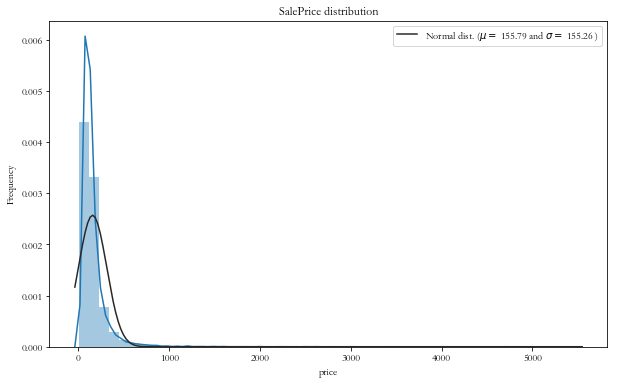

<Figure size 432x288 with 0 Axes>

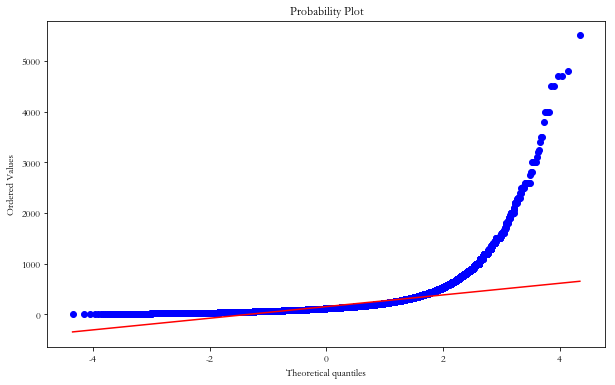

In [5]:
def plt_distribution(data, obj_col):
    plt.figure(figsize=(10,6))
    sns.distplot(data[obj_col] , fit=norm);

    # 获取数据分布曲线的拟合均值和标准差
    (mu, sigma) = norm.fit(data[obj_col])
    print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

    # 绘制分布曲线
    
    plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
                loc='best')
    plt.ylabel('Frequency')
    plt.title('SalePrice distribution')
    
    # 绘制图像查看数据的分布状态
    fig = plt.figure()
    plt.figure(figsize=(10,6))
    tmp = stats.probplot(data[obj_col], plot=plt)
    plt.show()
plt_distribution(df, 'price')        # 目标变量变换前的分布情况


 mu = 4.82 and sigma = 0.64



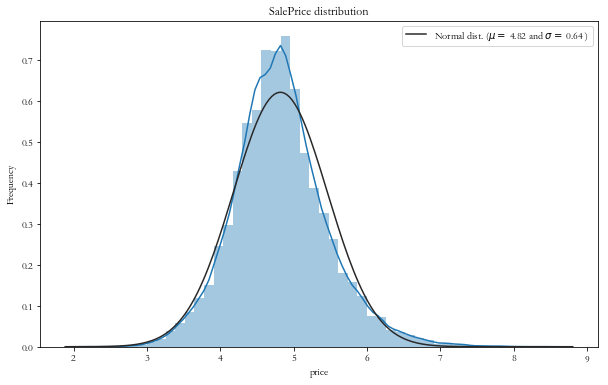

<Figure size 432x288 with 0 Axes>

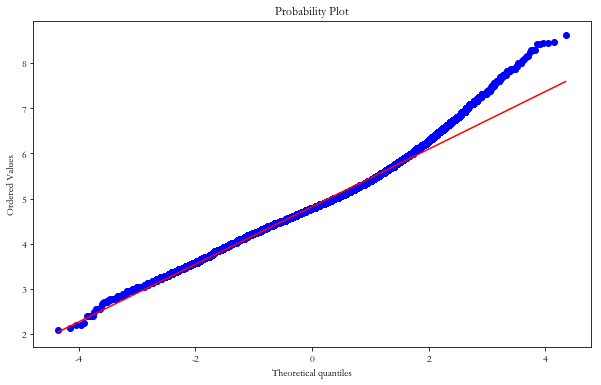

In [6]:
# 目标变量呈现明显的偏态分布，需要将它变换成无偏的正态分布，因为通常的线性模型所针对的数据都是正态分布的数据。
df["price"] = np.log1p(df["price"]) # 对数变换
plt_distribution(df, 'price') # 变换后的分布情况

# 特征编码

### 1.顺序特征编码-处理楼层信息

In [7]:
np.unique(df['floor'])

array(['中层(共10层)', '中层(共11层)', '中层(共12层)', '中层(共13层)', '中层(共14层)',
       '中层(共15层)', '中层(共16层)', '中层(共17层)', '中层(共18层)', '中层(共19层)',
       '中层(共20层)', '中层(共21层)', '中层(共22层)', '中层(共23层)', '中层(共24层)',
       '中层(共25层)', '中层(共26层)', '中层(共27层)', '中层(共28层)', '中层(共29层)',
       '中层(共30层)', '中层(共31层)', '中层(共32层)', '中层(共33层)', '中层(共34层)',
       '中层(共35层)', '中层(共38层)', '中层(共6层)', '中层(共7层)', '中层(共8层)', '中层(共9层)',
       '中楼层 (共10层)', '中楼层 (共11层)', '中楼层 (共12层)', '中楼层 (共13层)',
       '中楼层 (共14层)', '中楼层 (共15层)', '中楼层 (共16层)', '中楼层 (共17层)',
       '中楼层 (共18层)', '中楼层 (共19层)', '中楼层 (共20层)', '中楼层 (共21层)',
       '中楼层 (共22层)', '中楼层 (共23层)', '中楼层 (共24层)', '中楼层 (共25层)',
       '中楼层 (共26层)', '中楼层 (共27层)', '中楼层 (共28层)', '中楼层 (共29层)',
       '中楼层 (共30层)', '中楼层 (共31层)', '中楼层 (共32层)', '中楼层 (共33层)',
       '中楼层 (共34层)', '中楼层 (共35层)', '中楼层 (共36层)', '中楼层 (共37层)',
       '中楼层 (共38层)', '中楼层 (共39层)', '中楼层 (共40层)', '中楼层 (共41层)',
       '中楼层 (共42层)', '中楼层 (共43层)', '中楼层 (共44层)', '中楼层 (共45层)',
       '中楼层 (共46层)', '中

In [8]:
## 定义函数对顺序变量进行编码
# 10层为标准
import re
level = 0
def process_floor(x):
    floor_level = x[0:1]
    floor_level_num = int(re.findall(r"\d+\.?\d*",x)[0]) if re.findall(r"\d+\.?\d*",x) else 1
    if floor_level == '低' and floor_level_num < 10:
        level = 0
    elif floor_level == '中' and floor_level_num < 10:
        level = 1
    elif floor_level == '高' and floor_level_num < 10:
        level = 2
    if floor_level == '低' and floor_level_num >= 10:
        level = 3
    elif floor_level == '中' and floor_level_num >= 10:
        level = 4
    elif floor_level == '高' and floor_level_num >= 10:
        level = 5
    else:
        level = 0
    return level
## 顺序变量特征编码
cols = ['floor']
for col in cols:
    df[col] = df[col].apply(process_floor)

### 2.类别类编码

In [9]:
cols = ['region','type', 'construction_area', 'orientation', 'decoration','elevator','purposes','house_structure']
for col in cols:
    df[col] = df[col].astype(str)
del cols, col

### 3.字符型特征标签编码(独热编码(OneHotEncoder)和标签编码(LabelEncoder)编码)

In [10]:
df['construction_area']=df['construction_area'].astype(float)
## 年份特征的标签编码
# str_cols = ["year"]
# for col in str_cols:
#     df[col] = LabelEncoder().fit_transform(df[col])

## 为了后续构建有意义的其他特征而进行标签编码
lab_cols = ['orientation','elevator', 'purposes', 'house_structure','decoration']

for col in lab_cols:
    new_col = "lab_" + col
    df[new_col] = LabelEncoder().fit_transform(df[col]) 
        
del col,lab_cols,new_col

In [11]:
df['type'].value_counts()

3室2厅2卫     19729
2室1厅1卫     16912
2室2厅1卫     12515
1室1厅1卫      9721
3室2厅1卫      8839
           ...  
8室2厅2卫         1
9室2厅6卫         1
11室2厅5卫        1
4室5厅3卫         1
0室1厅0卫         1
Name: type, Length: 206, dtype: int64

In [12]:
# 单独处理户型
# 用 str.extract() 方法，将"室","厅","卫"都提取出来，单独作为三个新特征
df['type_room_num'] = df['type'].str.extract('(^\d).*', expand=False)
df['type_hall_num'] = df['type'].str.extract('^\d.*?(\d).*', expand=False)
df['type_wash_num'] = df['type'].str.extract('^\d.*?\d.*?(\d).*', expand=False)
df['type_room_num'] = df['type_room_num'].fillna('1').astype('int64')
df['type_hall_num'] = df['type_hall_num'].fillna('1').astype('int64')
df['type_wash_num'] = df['type_wash_num'].fillna('1').astype('int64')

In [13]:
# 单独处理行政区划
#使用one-hot编码修改特征"region"
import re
df['region'] = df['region'].apply(lambda x: re.sub(r"\[|\]|'", '', x).split(',')[0])
district = pd.get_dummies(df['region'], prefix='行政区划')
data = pd.concat([df, district], axis=1)
fin_data = data.copy()
data.drop(['unit_price','price','title','floor','construction_area','from_url','idi','image_urls','release_date','lat','lng','community_name','type','orientation','elevator', 'purposes', 'house_structure','decoration'], axis=1, inplace=True)
data

,region,lab_orientation,lab_elevator,lab_purposes,lab_house_structure,lab_decoration,type_room_num,type_hall_num,type_wash_num,行政区划_双流,...,行政区划_郫都,行政区划_都江堰,行政区划_金堂,行政区划_金牛,行政区划_锦江,行政区划_青白江,行政区划_青羊,行政区划_高新,行政区划_高新西,行政区划_龙泉驿
0,成华,53,1,6,7,2,3,2,1,0,...,0,0,0,0,0,0,0,0,0,0
1,成华,53,2,6,3,5,2,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,成华,53,2,6,7,4,3,2,1,0,...,0,0,0,0,0,0,0,0,0,0
3,成华,53,2,6,7,5,2,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,成华,53,2,6,7,4,2,2,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100977,新津,68,1,6,3,4,3,2,2,0,...,0,0,0,0,0,0,0,0,0,0
100978,新津,101,1,6,2,4,2,1,1,0,...,0,0,0,0,0,0,0,0,0,0
100979,新津,29,2,6,6,4,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
100980,新津,0,1,6,2,4,4,2,2,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# 删除旧特征
fin_data.drop(['title','from_url','idi','region','image_urls','release_date','lat','lng','community_name','type','orientation','elevator', 'purposes', 'house_structure','decoration'], axis=1, inplace=True)

# 相关系数

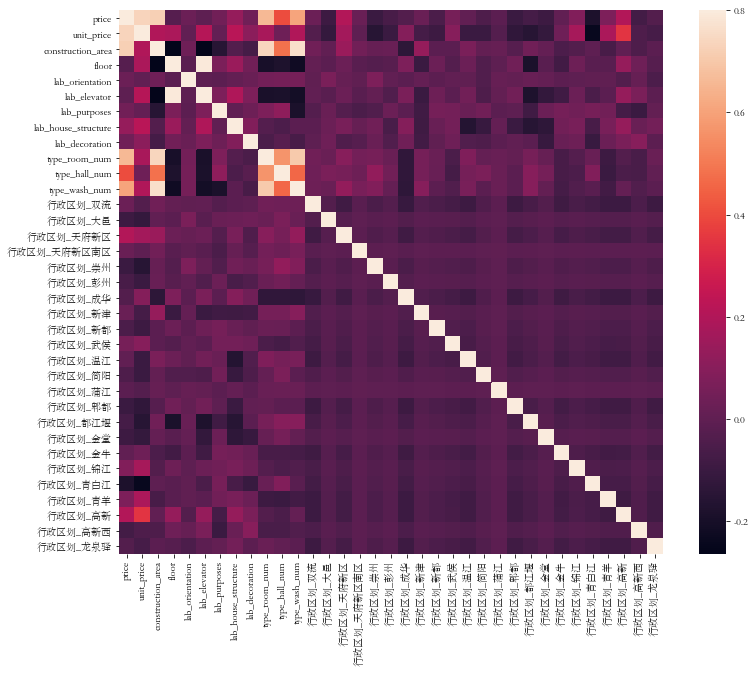

In [15]:
corrmat = fin_data.corr()
 
f, ax = plt.subplots(figsize=(13, 10))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

In [16]:
# k=10
# cols = corrmat.nlargest(k, 'price')['price'].index
# cm = np.corrcoef(fin_data[cols].values.T)
# sns.set(font_scale=1.25)
# hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
# plt.show()

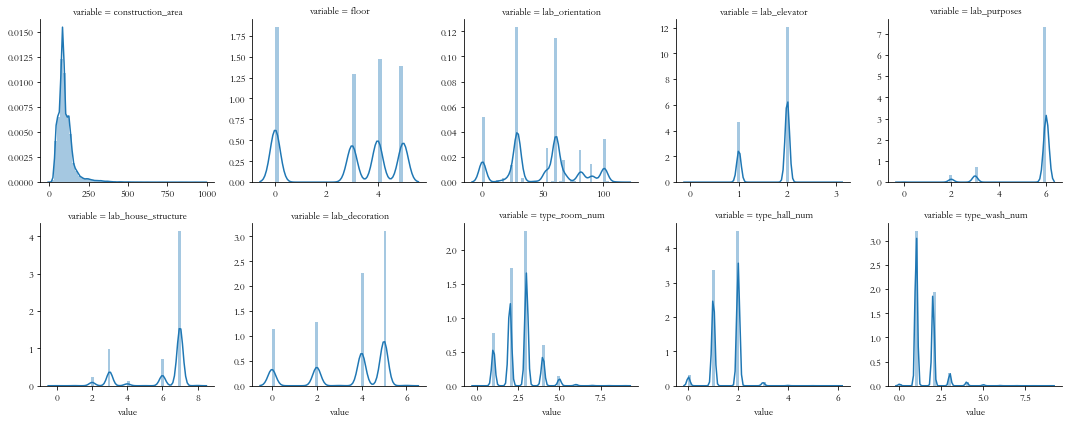

In [17]:
num_features = fin_data.select_dtypes(include=['int64','float64','int32']).copy()
num_features.drop(['price','unit_price'],axis=1,inplace=True)
num_feature_names = list(num_features.columns)

num_features_data = pd.melt(fin_data, value_vars=num_feature_names)
g = sns.FacetGrid(num_features_data, col="variable",  col_wrap=5, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")
plt.show()

In [18]:
# 计算各数值型特征变量的偏度（skewness）
skewed_feats = fin_data[num_feature_names].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness
# skewness[skewness["Skew"].abs()>0.75]

,Skew
construction_area,3.288533
type_wash_num,1.721692
type_room_num,0.444548
lab_orientation,0.080359
type_hall_num,-0.327500
floor,-0.476538
lab_decoration,-0.956232
lab_elevator,-0.990491
lab_house_structure,-1.342497
lab_purposes,-2.441383


In [19]:
skew_cols = list(skewness[skewness["Skew"].abs()>1].index)
for col in skew_cols:
    #fin_data[col] = boxcox1p(all_data[col], 0.15)                                  # 偏度超过阈值的特征做box-cox变换
    fin_data[col] = np.log1p(fin_data[col])                                                  # 偏度超过阈值的特征对数变换
    
del num_features, num_feature_names, num_features_data, g, skewed_feats, col, skew_cols      # 清除临时变量

In [20]:
fin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100982 entries, 0 to 100981
Data columns (total 35 columns):
price                  100982 non-null float64
unit_price             100982 non-null float64
construction_area      100982 non-null float64
floor                  100982 non-null int64
lab_orientation        100982 non-null int32
lab_elevator           100982 non-null int32
lab_purposes           100982 non-null float64
lab_house_structure    100982 non-null float64
lab_decoration         100982 non-null int32
type_room_num          100982 non-null int64
type_hall_num          100982 non-null int64
type_wash_num          100982 non-null float64
行政区划_双流                100982 non-null uint8
行政区划_大邑                100982 non-null uint8
行政区划_天府新区              100982 non-null uint8
行政区划_天府新区南区            100982 non-null uint8
行政区划_崇州                100982 non-null uint8
行政区划_彭州                100982 non-null uint8
行政区划_成华                100982 non-null uint8
行政区划_新津               

# 特征降维

In [33]:
#确定数据中的特征与标签
fin_data.drop(['unit_price'], axis=1, inplace=True)
x = fin_data.as_matrix()[:,1:]
y = fin_data.as_matrix()[:,0].reshape(-1,1)
 
#数据分割，随机采样25%作为测试样本，其余作为训练样本
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=40, test_size=0.25)

#数据标准化处理(归一化)
ss_x = StandardScaler()
ss_y = StandardScaler()
x_train = ss_x.fit_transform(x_train)
x_test = ss_x.transform(x_test)
y_train = ss_y.fit_transform(y_train)
y_test = ss_y.transform(y_test)

# 特征选择-（我们此处不需要）

In [22]:
# 特征的选择--基于特征重要性图来选择:
from sklearn.linear_model import Lasso##运用算法来进行训练集的得到特征的重要性，特征选择的一个作用是，wrapper基础模型
lasso_model=Lasso(alpha=0.001)
lasso_model.fit(x_train,y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [23]:
# 索引和重要性做成dataframe形式
FI_lasso = pd.DataFrame({"Feature Importance":lasso_model.coef_}, index=fin_data.drop(["price"],axis=1).columns) 
# 由高到低进行排序
FI_lasso.sort_values("Feature Importance",ascending=False).round(5)   

,Feature Importance
construction_area,0.70055
行政区划_高新,0.19788
行政区划_青羊,0.16280
行政区划_锦江,0.12236
行政区划_成华,0.11678
type_room_num,0.10659
行政区划_武侯,0.10374
行政区划_天府新区,0.10078
lab_elevator,0.09937
行政区划_金牛,0.09001


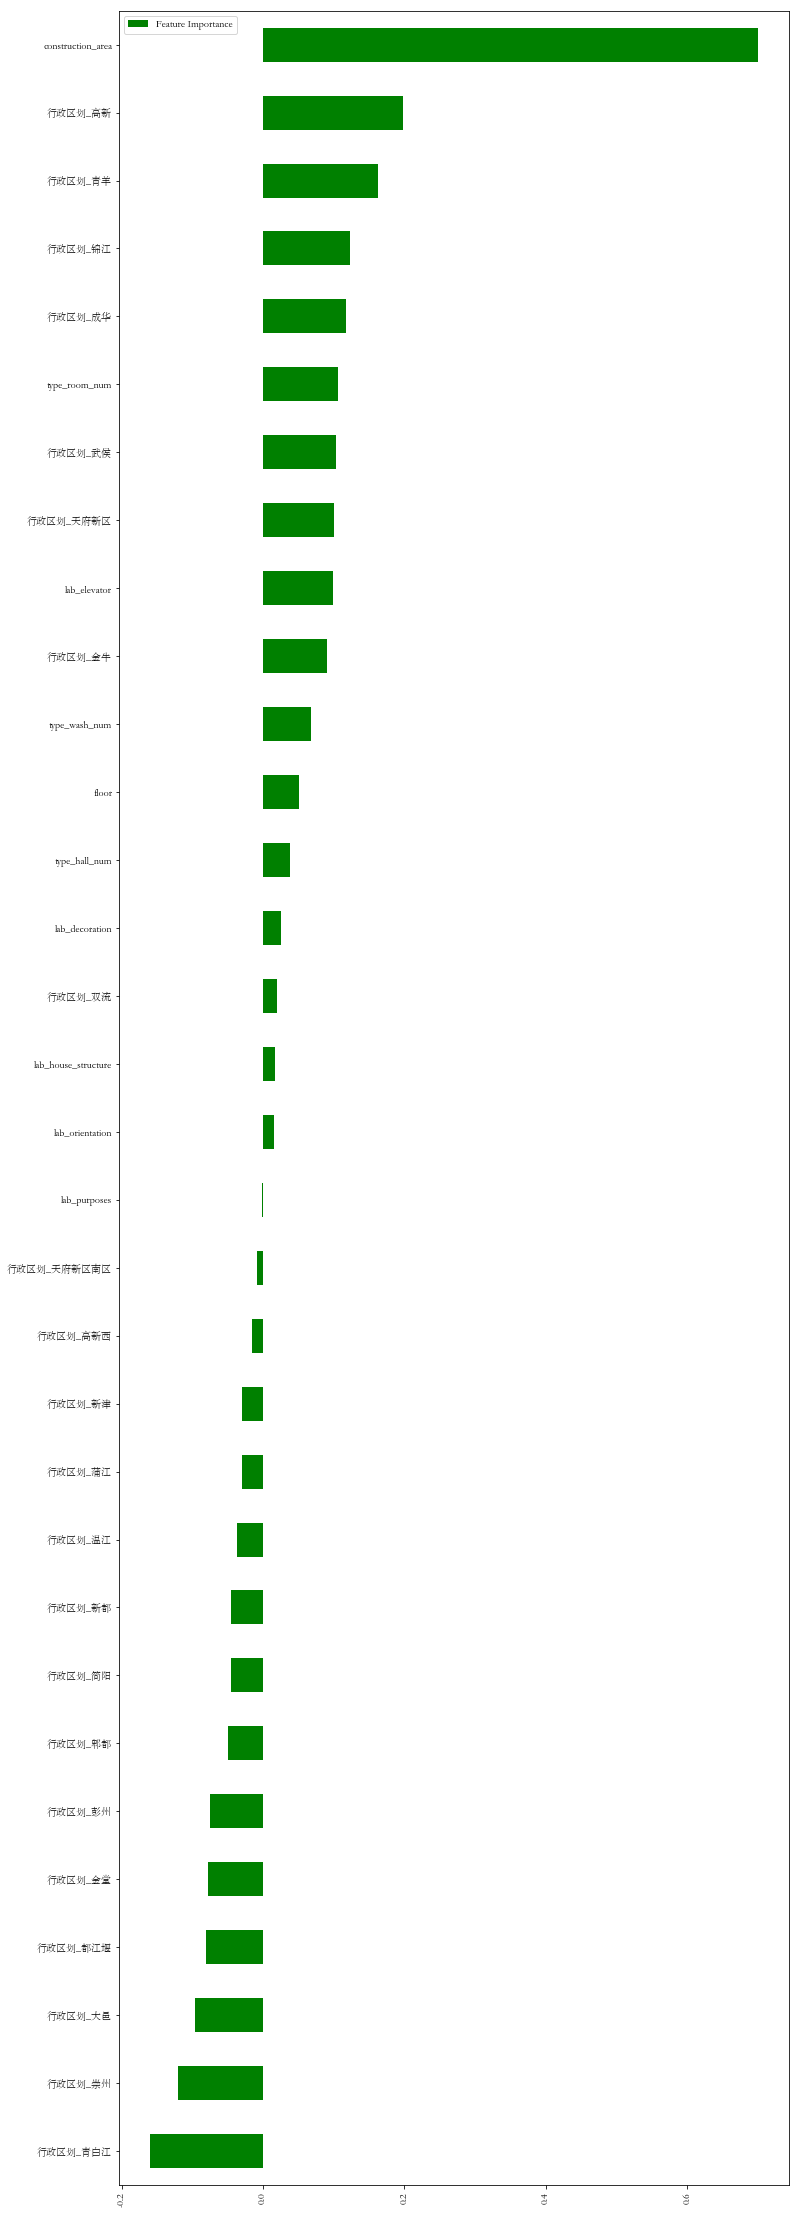

(33, 1)

In [24]:
## 获取重要程度大于0的系数指标
FI_lasso[FI_lasso["Feature Importance"] !=0 ].sort_values("Feature Importance").plot(kind="barh",figsize=(12,40), color='g')
plt.xticks(rotation=90)
plt.show()                     ##画图显示

FI_index = FI_lasso.index
FI_val = FI_lasso["Feature Importance"].values
FI_lasso = pd.DataFrame(FI_val, columns = ['Feature Importance'], index = FI_index)
display(FI_lasso.shape)

In [25]:
# choose_cols = FI_lasso.index.tolist()
# choose_cols.append("price")
# choose_data = fin_data[choose_cols].copy()
# del fin_data

# 建立模型

In [21]:
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.linear_model import ElasticNet, SGDRegressor, BayesianRidge
from sklearn.kernel_ridge import KernelRidge
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.metrics import r2_score

import math
def get_mse(records_real, records_predict):
    # 均方误差 估计值与真值 偏差
    if len(records_real) == len(records_predict):
        return sum([(x - y) ** 2 for x, y in zip(records_real, records_predict)]) / len(records_real)
    else:
        return None

def get_rmse(records_real, records_predict):
    # 均方根误差：是均方误差的算术平方根
    mse = get_mse(records_real, records_predict)
    if mse:
        return math.sqrt(mse)
    else:
        return None

#定义交叉验证的策略，以及评估函数
def rmse_cv(model,X,y):
    # 针对各折数据集的测试结果的均方根误差
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5))   # cv 代表数据划分的KFold折数
    return rmse

In [22]:
# 搜索各个算法的超参数
# 定义先验参数网格搜索验证方法
class grid():
    def __init__(self,model):
        self.model = model
    
    def grid_get(self,X,y,param_grid):
        grid_search = GridSearchCV(self.model,param_grid,cv=5, scoring="neg_mean_squared_error")
        grid_search.fit(X,y)
        # 打印最佳参数及对应的评估指标
        print(grid_search.best_params_, np.sqrt(-grid_search.best_score_))
        grid_search.cv_results_['mean_test_score'] = np.sqrt(-grid_search.cv_results_['mean_test_score'])
        
        # 打印单独的各参数组合参数及对应的评估指标
        print(pd.DataFrame(grid_search.cv_results_)[['params','mean_test_score','std_test_score']])

In [30]:
# 主成分分析
pca_model = PCA(n_components=33)
x_train = pca_model.fit_transform(x_train)
y_train = pca_model.transform(y_train)

### K近邻

In [34]:
# r2
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)
y_pre_knn = knn.predict(x_test)
knn_score = r2_score(y_test,y_pre_knn)
print(knn_score)

0.8491326261885698


In [26]:
# 均方误差
knn_score = get_mse(y_test,y_pre_knn)
print(knn_score)

[0.14934448]


In [35]:
# # 均方根误差
knn_score = get_rmse(y_test,y_pre_knn)
print(knn_score)

0.386451138583249


In [27]:
# 交叉验证
print(rmse_cv(knn,x_train,y_train))

[0.38884963 0.39050593 0.38762811 0.38286215 0.39189377]


### 线性回归

In [46]:
linear = LinearRegression()
linear.fit(x_train,y_train)
y_pre_linear = linear.predict(x_test)
linear_score=r2_score(y_test,y_pre_linear)
print(linear_score)

0.8326275747742252


In [51]:
# lasso = Lasso(alpha=0.0004,random_state=1,max_iter=10000)
# lasso.fit(x_train,y_train)
# y_pre_lasso = lasso.predict(x_test)
# lasso_score=r2_score(y_test,y_pre_lasso)
# print(lasso_score)

0.8326348338600317


## 集成模型算法

#### 1. Lasso回归

In [31]:
param_grid = {'alpha': [0.0004,0.0005,0.0006,0.0007,0.0008,0.0009],'max_iter':[10000],'random_state':[1]}
grid(Lasso()).grid_get(x_train, y_train, param_grid)

{'alpha': 0.0004, 'max_iter': 10000, 'random_state': 1} 0.40570708106223147
                                              params  mean_test_score  \
0  {'alpha': 0.0004, 'max_iter': 10000, 'random_s...         0.405707   
1  {'alpha': 0.0005, 'max_iter': 10000, 'random_s...         0.405710   
2  {'alpha': 0.0006, 'max_iter': 10000, 'random_s...         0.405714   
3  {'alpha': 0.0007, 'max_iter': 10000, 'random_s...         0.405717   
4  {'alpha': 0.0008, 'max_iter': 10000, 'random_s...         0.405722   
5  {'alpha': 0.0009, 'max_iter': 10000, 'random_s...         0.405727   

   std_test_score  
0        0.002711  
1        0.002712  
2        0.002713  
3        0.002713  
4        0.002714  
5        0.002714  


#### 2. Ridge(岭回归)

In [32]:
param_grid = {'alpha':[35,40,45,50,55,60,65,70,80,90]}
grid(Ridge()).grid_get(x_train, y_train, param_grid)

{'alpha': 35} 0.4057021785303043
          params  mean_test_score  std_test_score
0  {'alpha': 35}         0.405702        0.002707
1  {'alpha': 40}         0.405702        0.002707
2  {'alpha': 45}         0.405703        0.002707
3  {'alpha': 50}         0.405703        0.002707
4  {'alpha': 55}         0.405703        0.002707
5  {'alpha': 60}         0.405703        0.002708
6  {'alpha': 65}         0.405704        0.002708
7  {'alpha': 70}         0.405704        0.002708
8  {'alpha': 80}         0.405705        0.002708
9  {'alpha': 90}         0.405706        0.002708


#### 3.SVR(支持向量回归)

In [ ]:
param_grid = {'C':[11,12,13,14,15],'kernel':["rbf"],"gamma":[0.0003,0.0004],"epsilon":[0.008,0.009]}
grid(SVR()).grid_get(x_train, y_train, param_grid)

#### 4.ElasticNet回归

In [ ]:
param_grid = {'alpha':[0.0005,0.0008,0.004,0.005],'l1_ratio':[0.08,0.1,0.3,0.5,0.7],'max_iter':[10000],'random_state':[3]}
grid(ElasticNet()).grid_get(x_train, y_train, param_grid)

In [36]:
params = {'min_child_weight':[4,5], 'gamma':[i/10.0 for i in range(3,6)],  'subsample':[i/10.0 for i in range(6,11)],
'colsample_bytree':[i/10.0 for i in range(6,11)], 'max_depth': [2,3,4]}

In [40]:
xgb = XGBRegressor(objective ='reg:squarederror')
grid(xgb).grid_get(x_train, y_train, params)

### 根据网格交叉验证结果指定各算法的超参数：

In [35]:
#指定每一个算法的参数
lasso = Lasso(alpha=0.0004,random_state=1,max_iter=10000)
ridge = Ridge(alpha=35)
svr = SVR(gamma= 0.0004,kernel='rbf',C=14,epsilon=0.009)
# ker = KernelRidge(alpha=0.4 ,kernel='polynomial',degree=3 , coef0=1.2)
ela = ElasticNet(alpha=0.004,l1_ratio=0.08,random_state=3,max_iter=10000)
bay = BayesianRidge()
xgb = XGBRegressor(colsample_bytree=0.4603, gamma=0.0468,learning_rate=0.05, max_depth=3,
                   min_child_weight=1.7817, n_estimators=2200,reg_alpha=0.4640, 
                   reg_lambda=0.8571,subsample=0.5213, silent=1,random_state =7, nthread = -1)
lgbm = LGBMRegressor(objective='regression',num_leaves=5,learning_rate=0.05, n_estimators=700,max_bin = 55,
                     bagging_fraction = 0.8,bagging_freq = 5, feature_fraction = 0.25,feature_fraction_seed=9, 
                     bagging_seed=9,min_data_in_leaf = 6, min_sum_hessian_in_leaf = 11)
GBR = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,max_depth=4, max_features='sqrt',
                                min_samples_leaf=15, min_samples_split=10, loss='huber', random_state =5)

In [51]:
score = []
models = [ela,svr,bay,lasso,ridge,xgb,lgbm,GBR]
for regre in models:
    regre.fit(x_train,y_train)
    y_pre_regre = regre.predict(x_test)
    regre_score=r2_score(y_test,y_pre_regre)
    score.append(regre_score)
    print('current model is {},rmse: {}'.format(regre,regre_score))
print('Optimal model is: {} , score is : {}'.format(models[score.index(max(score))],max(score)))

current model is ElasticNet(alpha=0.004, copy_X=True, fit_intercept=True, l1_ratio=0.08,
           max_iter=10000, normalize=False, positive=False, precompute=False,
           random_state=3, selection='cyclic', tol=0.0001, warm_start=False),rmse: 0.832595294722317
current model is SVR(C=14, cache_size=200, coef0=0.0, degree=3, epsilon=0.009, gamma=0.0004,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),rmse: 0.8650937001121479
current model is BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
              fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
              normalize=False, tol=0.001, verbose=False),rmse: 0.8326267353040837
current model is Lasso(alpha=0.0004, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=False, positive=False, precompute=False, random_state=1,
      selection='cyclic', tol=0.0001, warm_start=False),rmse: 0.8326348338600317
current model is Ridge(alpha=35, copy_X=True, 

# Stacking过程

In [29]:
class stacking(BaseEstimator, RegressorMixin, TransformerMixin):
    ##=============== 参数说明 ================##
    # mod --- 堆叠过程的第一层中的算法
    # meta_model --- 堆叠过程的第二层中的算法，也称次学习器
    
    def __init__(self,mod,meta_model):
        self.mod = mod                                                # 首层学习器模型
        self.meta_model = meta_model                                  # 次学习器模型
        self.kf = KFold(n_splits=5, random_state=42, shuffle=True)    # 这就是堆叠的最大特征进行了几折的划分
    
    ## 训练函数
    def fit(self,X,y):
        self.saved_model = [list() for i in self.mod]          # self.saved_model包含所有第一层学习器
        oof_train = np.zeros((X.shape[0], len(self.mod)))      # 维度：训练样本数量*模型数量，训练集的首层预测值
        
        for i,model in enumerate(self.mod):                    #返回的是索引和模型本身
            for train_index, val_index in self.kf.split(X,y):  #返回的是数据分割成分（训练集和验证集对应元素）的索引
                renew_model = clone(model)                     #模型的复制
                renew_model.fit(X[train_index], y[train_index])           #对分割出来的训练集数据进行训练
                self.saved_model[i].append(renew_model)                   #把模型添加进去
                #oof_train[val_index,i] = renew_model.predict(X[val_index]).reshape(-1,1) #用来预测验证集数据
                
                val_prediction = renew_model.predict(X[val_index]).reshape(-1,1)    # 验证集的预测结果，注：结果是没有索引的
                
                for temp_index in range(val_prediction.shape[0]):
                    oof_train[val_index[temp_index],i] = val_prediction[temp_index] #用来预测验证集数据的目标值
                
        self.meta_model.fit(oof_train,y)                       # 次学习器模型训练，这里只是用到了首层预测值作为特征
        return self
    
    ## 预测函数
    def predict(self,X):
        whole_test = np.column_stack([np.column_stack(model.predict(X) for model in single_model).mean(axis=1) 
                                      for single_model in self.saved_model])        #得到的是整个测试集的首层预测值
        return self.meta_model.predict(whole_test)            # 返回次学习器模型对整个测试集的首层预测值特征的最终预测结果              
    
    ## 获取首层学习结果的堆叠特征
    def get_oof(self,X,y,test_X):                 
        oof = np.zeros((X.shape[0],len(self.mod)))                #初始化为0
        test_single = np.zeros((test_X.shape[0],5))               #初始化为0 
        #display(test_single.shape)
        test_mean = np.zeros((test_X.shape[0],len(self.mod)))
        for i,model in enumerate(self.mod):                       #i是模型
            for j, (train_index,val_index) in enumerate(self.kf.split(X,y)):          #j是所有划分好的的数据
                clone_model = clone(model)                                            #克隆模块，相当于把模型复制一下
                clone_model.fit(X[train_index],y[train_index])                        #把分割好的数据进行训练
                
                val_prediction = clone_model.predict(X[val_index]).reshape(-1,1)      # 验证集的预测结果，注：结果是没有索引的
                for temp_index in range(val_prediction.shape[0]):
                    oof[val_index[temp_index],i] = val_prediction[temp_index]         #用来预测验证集数据
                    
                #oof[val_index,i] = clone_model.predict(X[val_index]).reshape(-1,1)    #对验证集进行预测
                # test_single[:,j] = clone_model.predict(test_X).reshape(-1,1)           #对测试集进行预测
                
                test_prediction = clone_model.predict(test_X).reshape(-1,1)           #对测试集进行预测
                
                # display(test_prediction.shape)
                test_single[:,j] = test_prediction[:,0]
            test_mean[:,i] = test_single.mean(axis=1)                                  #测试集算好均值
        return oof, test_mean

In [34]:
# stacking模型定义及初步评估
# stack_model = stacking(mod=[ela,svr,bay,lasso,ridge,ker], meta_model=ker)

# x_train = Imputer().fit_transform(x_train)
# y_train = Imputer().fit_transform(y_train.reshape(-1,1)).ravel()

# score = rmse_cv(stack_model,x_train, y_train)                 # 训练过程的评估指标
# display(score.mean())